# K-means clustering for the Iris data set

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import dagstermill

from dagster import Field, Int, SolidDefinition

context = dagstermill.get_context(
    solid_config=3
)

path = 'iris.data'

In [3]:
iris = pd.read_csv(
    path,
    names=['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)', 'Species']
)

In [4]:
iris.head()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris.describe()

,Sepal length (cm),Sepal width (cm),Petal length (cm),Petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


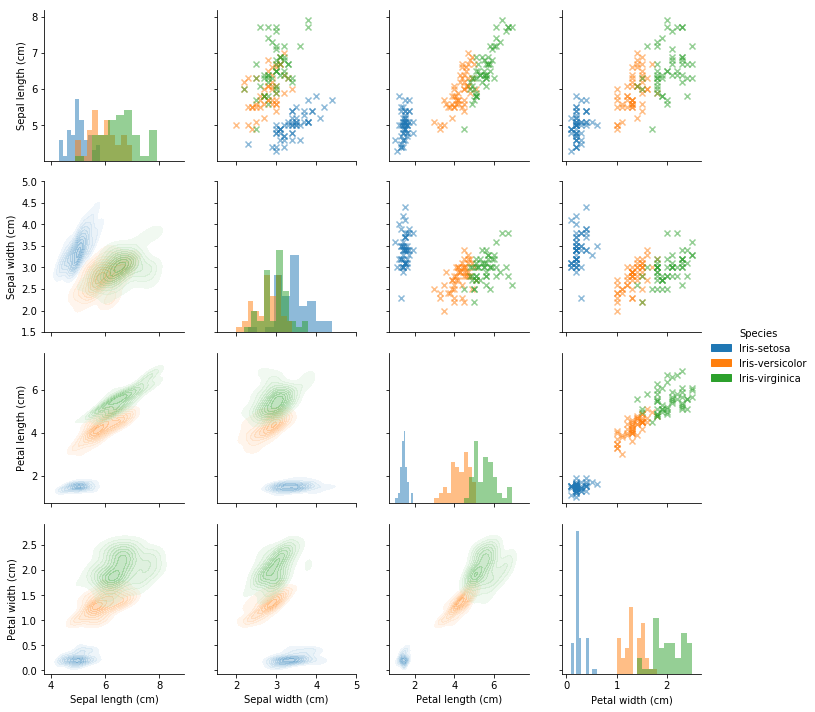

In [7]:
g = sns.PairGrid(iris, hue="Species")
g.map_diag(plt.hist, alpha=0.5)
g.map_upper(plt.scatter, alpha=0.5, marker='x')
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False, alpha=0.3)
g.add_legend();

Famously, while it's easy to see from theese plots that _Iris setosa_ is linearly separable from the other two species, the _versicolor_ and _virginica_ flowers are not linearly separable. We can see this another way by looking at box plots of the measured attributes:

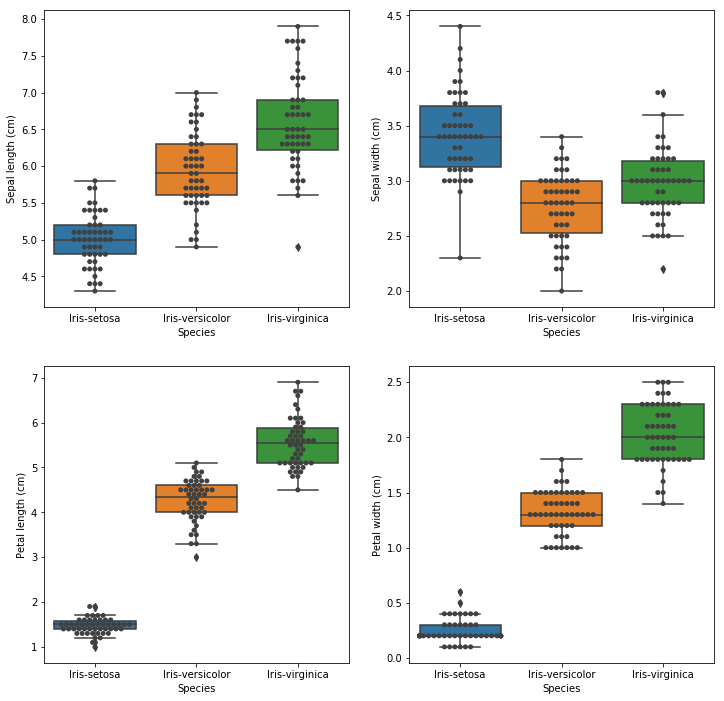

In [8]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

sns.boxplot(x="Species", y="Sepal length (cm)", data=iris, ax=axs[0, 0])
sns.swarmplot(x="Species", y="Sepal length (cm)", data=iris, color=".25", ax=axs[0, 0])

sns.boxplot(x="Species", y="Sepal width (cm)", data=iris, ax=axs[0, 1])
sns.swarmplot(x="Species", y="Sepal width (cm)", data=iris, color=".25", ax=axs[0, 1])

sns.boxplot(x="Species", y="Petal length (cm)", data=iris, ax=axs[1, 0])
sns.swarmplot(x="Species", y="Petal length (cm)", data=iris, color=".25", ax=axs[1, 0])

sns.boxplot(x="Species", y="Petal width (cm)", data=iris, ax=axs[1, 1])
sns.swarmplot(x="Species", y="Petal width (cm)", data=iris, color=".25", ax=axs[1, 1])

If we try to cluster this data using a method such as _k_-means, we'll be unsuccessful. Consider:

In [9]:
import sklearn.cluster
estimator = sklearn.cluster.KMeans(n_clusters=context.solid_config)
estimator.fit(iris[['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
iris['K-means cluster assignment'] = estimator.labels_

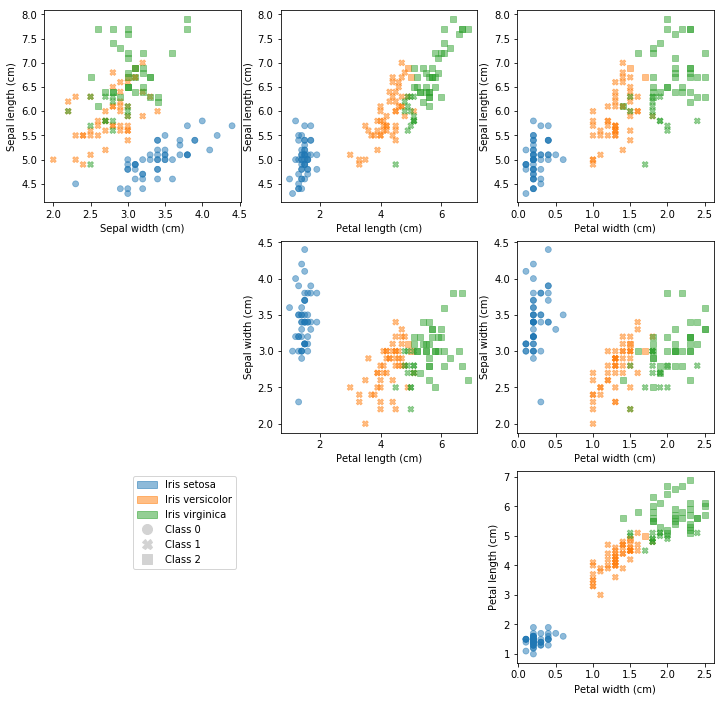

In [11]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))

sns.scatterplot(x="Sepal width (cm)", y="Sepal length (cm)", data=iris, ax=axs[0, 0], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)
sns.scatterplot(x="Petal length (cm)", y="Sepal length (cm)", data=iris, ax=axs[0, 1], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)
sns.scatterplot(x="Petal width (cm)", y="Sepal length (cm)", data=iris, ax=axs[0, 2], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)

sns.scatterplot(x="Petal length (cm)", y="Sepal width (cm)", data=iris, ax=axs[1, 1], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)
sns.scatterplot(x="Petal width (cm)", y="Sepal width (cm)", data=iris, ax=axs[1, 2], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)

p = sns.scatterplot(x="Petal width (cm)", y="Petal length (cm)", data=iris, ax=axs[2, 2], hue="Species", style="K-means cluster assignment", legend=False, marker="x", alpha=0.5)

axs[1, 0].axis('off')
axs[2, 0].axis('off')
axs[2, 1].axis('off')

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

palette = sns.color_palette()
setosa = mpatches.Patch(color=palette[0], label='Iris setosa', alpha=0.5)
versicolor = mpatches.Patch(color=palette[1], label='Iris versicolor', alpha=0.5)
virginica = mpatches.Patch(color=palette[2], label='Iris virginica', alpha=0.5)

class_0 = mlines.Line2D([], [], marker='o', color='lightgrey', linestyle='None', markersize=10, label='Class 0')
class_1 = mlines.Line2D([], [], marker='X', color='lightgrey', linestyle='None', markersize=10, label='Class 1')
class_2 = mlines.Line2D([], [], marker='s', color='lightgrey', linestyle='None', markersize=10, label='Class 2')

axs[2,0].legend(handles=[setosa, versicolor, virginica, class_0, class_1, class_2])


We can see that _versicolor_ and _virginica_ individuals are incorrectly classified by the _k_-means estimator.